In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2021-07.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.906084,6.942870,50.906151,6.941466,2021-07-02 04:12:01,2021-07-02 04:13:02,1.0,99.0,48414857,48597113,1692.0,NaN,BIKE 220700,1777
1,50.906151,6.941466,50.906013,6.942883,2021-07-02 04:13:02,2021-07-02 04:14:01,1.0,101.0,48597113,48597121,0.0,NaN,BIKE 220700,1867
2,50.906013,6.942883,50.925653,6.965592,2021-07-02 20:21:01,2021-07-02 20:46:01,25.0,2703.0,48597121,48662506,967.0,NaN,BIKE 220700,1867
3,50.925653,6.965592,50.955982,6.973292,2021-07-02 23:59:02,2021-07-03 11:03:01,664.0,3416.0,48662506,48699736,193.0,NaN,BIKE 220700,1939
4,50.955982,6.973292,50.921187,6.958677,2021-07-04 02:25:03,2021-07-04 02:45:02,20.0,4004.0,48699736,48771647,922.0,NaN,BIKE 220700,1951


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

196320

In [14]:
len(out_distances_total)

39731

In [15]:
len(out_rides)

34788

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

46710

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

27809

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

9.0        270
8.0        256
6.0        250
7.0        250
10.0       249
11.0       246
13.0       235
12.0       223
14.0       220
5.0        219
15.0       208
16.0       194
4.0        192
17.0       187
18.0       185
19.0       170
20.0       167
22.0       158
3.0        144
21.0       138
23.0       137
24.0       134
27.0       133
26.0       124
32.0       111
25.0       105
444.0      100
2.0        100
489.0       98
541.0       96
          ... 
5589.0       1
5772.0       1
6566.0       1
6471.0       1
6360.0       1
7682.0       1
5676.0       1
7519.0       1
6505.0       1
6736.0       1
7848.0       1
5619.0       1
4986.0       1
7296.0       1
6136.0       1
6378.0       1
7663.0       1
7685.0       1
5540.0       1
16568.0      1
7152.0       1
6227.0       1
5611.0       1
70562.0      1
6957.0       1
6506.0       1
5607.0       1
6790.0       1
7081.0       1
6862.0       1
Name: distance, Length: 6726, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

11922

In [23]:
len(out_distances + out_rides)

46710

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

23.792787286063568


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149610 entries, 0 to 149609
Data columns (total 15 columns):
index                   149610 non-null int64
lat_begin               149610 non-null float64
lng_begin               149610 non-null float64
lat_end                 149610 non-null float64
lng_end                 149610 non-null float64
ride_begin              149610 non-null object
ride_end                149610 non-null object
ride_time               149610 non-null float64
distance                149610 non-null float64
uid_begin               149610 non-null int64
uid_end                 149610 non-null int64
standing_before_ride    149610 non-null float64
address                 183 non-null object
name                    149610 non-null object
available_bikes         149610 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 17.1+ MB


In [27]:
df_c['distance'].value_counts()

444.0      100
489.0       98
541.0       96
482.0       94
722.0       94
749.0       94
605.0       94
494.0       92
632.0       92
492.0       92
560.0       91
565.0       91
451.0       90
534.0       90
477.0       90
514.0       89
478.0       89
407.0       88
701.0       88
465.0       88
666.0       88
382.0       88
707.0       88
400.0       87
579.0       87
370.0       87
583.0       87
568.0       87
498.0       87
454.0       87
          ... 
7184.0       1
4983.0       1
5975.0       1
5143.0       1
6846.0       1
7532.0       1
10304.0      1
5767.0       1
7095.0       1
6838.0       1
6000.0       1
7649.0       1
7033.0       1
5475.0       1
4505.0       1
5790.0       1
10537.0      1
6619.0       1
6052.0       1
6035.0       1
6532.0       1
8234.0       1
6642.0       1
6925.0       1
5254.0       1
7521.0       1
5458.0       1
7342.0       1
6333.0       1
6523.0       1
Name: distance, Length: 6515, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

5.0      10379
6.0       9963
7.0       9338
8.0       9066
4.0       8813
9.0       8280
10.0      7961
11.0      7117
12.0      6640
13.0      6149
14.0      5660
15.0      5279
16.0      4792
17.0      4486
3.0       4229
18.0      3948
19.0      3548
20.0      3232
21.0      2929
22.0      2624
23.0      2326
24.0      2087
25.0      1829
26.0      1547
27.0      1491
28.0      1243
29.0      1114
30.0       917
31.0       774
32.0       635
         ...  
509.0        1
648.0        1
620.0        1
555.0        1
690.0        1
518.0        1
602.0        1
593.0        1
423.0        1
650.0        1
699.0        1
503.0        1
695.0        1
531.0        1
697.0        1
466.0        1
686.0        1
476.0        1
533.0        1
627.0        1
606.0        1
580.0        1
619.0        1
611.0        1
609.0        1
539.0        1
618.0        1
666.0        1
672.0        1
540.0        1
Name: ride_time, Length: 674, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[5,
 9,
 36,
 98,
 108,
 126,
 127,
 262,
 273,
 315,
 344,
 397,
 473,
 515,
 573,
 581,
 643,
 651,
 652,
 653,
 666,
 729,
 732,
 806,
 816,
 829,
 854,
 913,
 953,
 954,
 986,
 1011,
 1044,
 1048,
 1064,
 1084,
 1115,
 1264,
 1267,
 1269,
 1390,
 1398,
 1422,
 1431,
 1459,
 1463,
 1524,
 1539,
 1540,
 1564,
 1583,
 1589,
 1647,
 1664,
 1665,
 1677,
 1798,
 1870,
 1871,
 1911,
 1979,
 1982,
 1996,
 2022,
 2096,
 2124,
 2130,
 2279,
 2304,
 2333,
 2358,
 2362,
 2376,
 2379,
 2389,
 2450,
 2527,
 2544,
 2548,
 2573,
 2589,
 2618,
 2621,
 2622,
 2745,
 2753,
 2759,
 2762,
 2768,
 2839,
 2908,
 2922,
 2990,
 2995,
 3029,
 3185,
 3204,
 3205,
 3222,
 3260,
 3278,
 3303,
 3358,
 3361,
 3369,
 3554,
 3555,
 3597,
 3648,
 3664,
 3667,
 3668,
 3676,
 3706,
 3747,
 3751,
 3752,
 3821,
 3868,
 3920,
 3948,
 3955,
 3965,
 4099,
 4100,
 4146,
 4203,
 4258,
 4342,
 4356,
 4596,
 4628,
 4629,
 4663,
 4782,
 4784,
 4923,
 4940,
 4992,
 5025,
 5026,
 5027,
 5028,
 5030,
 5067,
 5081,
 5082,
 5088,
 

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
5,8,50.917138,6.906824,50.918902,6.909860,2021-07-05 13:12:02,2021-07-05 13:15:01,3.0,290.0,48839186,48865861,738.0,NaN,BIKE 220700,1984
9,14,50.904102,6.938113,50.905622,6.939685,2021-07-10 19:54:01,2021-07-10 19:58:02,4.0,202.0,49263435,49323222,882.0,NaN,BIKE 220700,2055
36,52,50.931111,6.993623,50.931533,6.997564,2021-07-19 11:30:02,2021-07-19 11:33:02,3.0,280.0,50038591,50039098,6.0,NaN,BIKE 220700,2160
98,142,50.955600,6.907193,50.958031,6.907403,2021-07-15 14:46:01,2021-07-15 15:14:01,28.0,271.0,49694269,49711577,212.0,NaN,BIKE 221232,2126
108,157,50.913916,6.972039,50.916253,6.970598,2021-07-20 17:03:01,2021-07-20 17:06:02,3.0,279.0,50100315,50148363,915.0,NaN,BIKE 221232,2186
126,177,50.941249,6.948023,50.939387,6.947948,2021-07-27 13:44:02,2021-07-27 13:47:02,3.0,207.0,50731148,50737732,91.0,NaN,BIKE 221232,2321
127,178,50.939387,6.947948,50.941196,6.948142,2021-07-27 13:48:01,2021-07-27 13:52:02,4.0,202.0,50737732,50738074,1.0,NaN,BIKE 221232,2303
262,354,50.957009,6.999136,50.957569,6.995979,2021-07-06 13:03:02,2021-07-06 13:06:01,3.0,230.0,48879206,48948255,1247.0,NaN,BIKE 220531,1923
273,367,50.973307,7.009103,50.972169,7.006402,2021-07-09 07:13:02,2021-07-09 07:18:01,5.0,228.0,49174493,49185876,460.0,NaN,BIKE 220531,2055
315,430,50.967738,6.952953,50.965956,6.953712,2021-07-07 17:21:01,2021-07-07 17:24:02,3.0,205.0,49036907,49056183,221.0,NaN,BIKE 220479,1975


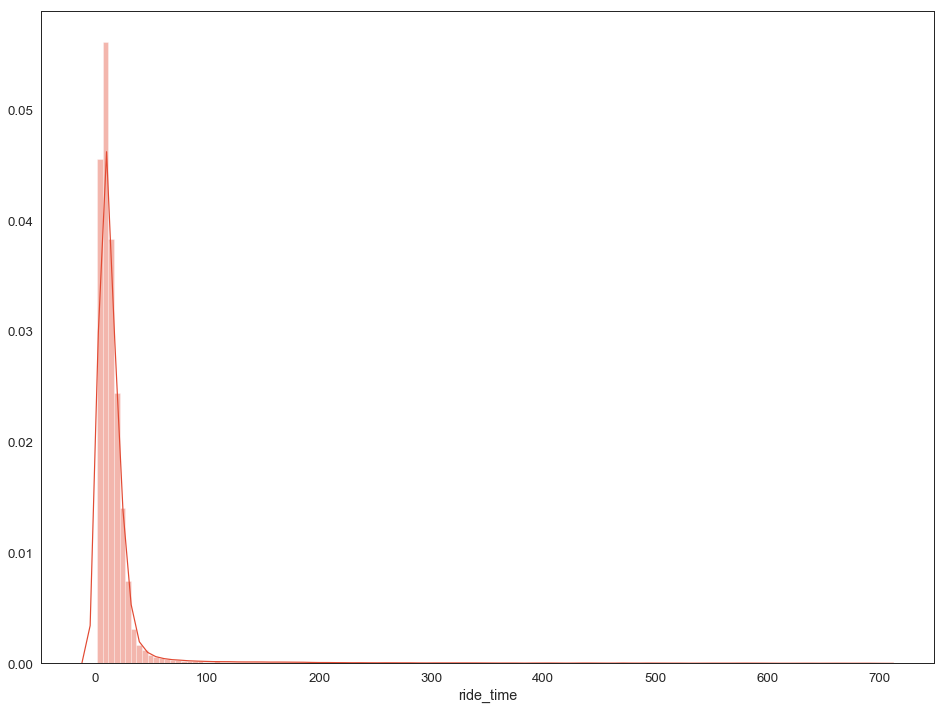

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

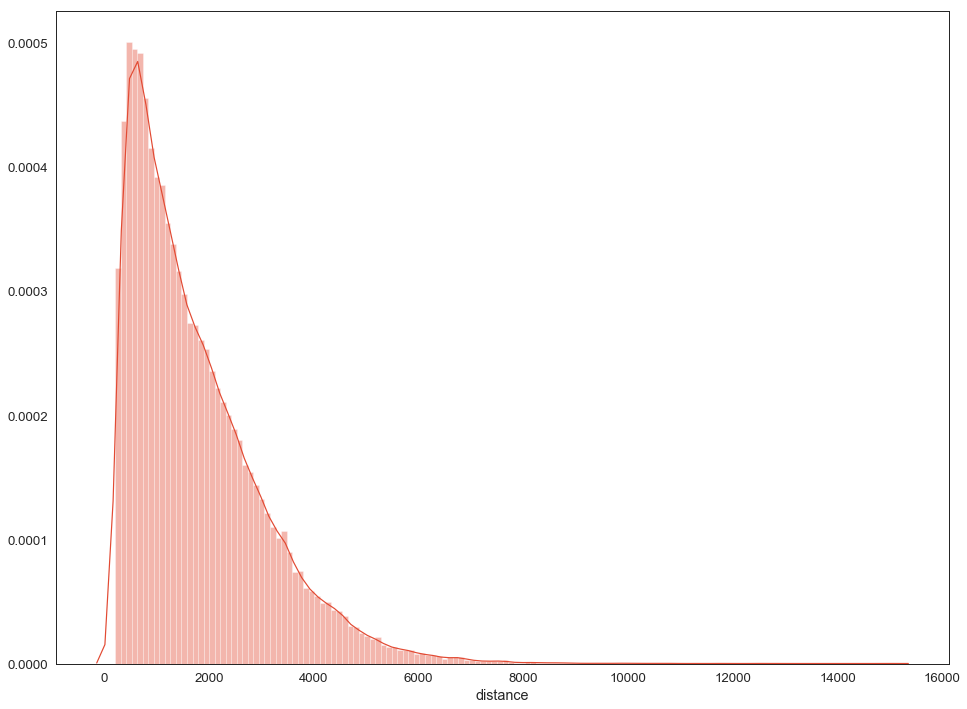

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
193,265,50.956333,6.958558,50.950431,6.933278,2021-07-18 23:12:02,2021-07-18 23:28:01,16.0,1889.0,49980147,50015201,394.0,recording_122543132,BIKE 222497,2064
389,524,50.901578,7.017646,50.901431,7.025450,2021-07-31 13:56:01,2021-07-31 14:01:02,5.0,548.0,51062844,51097025,262.0,"Oberstraße 112, 51149 Köln",BIKE 220479,2358
2323,3042,50.919516,6.935978,50.919684,6.950015,2021-07-22 11:25:01,2021-07-22 11:32:01,7.0,984.0,50300218,50301216,12.0,Beizhausstraße 23,BIKE 221798,2305
2881,3770,50.964764,6.982317,50.959342,6.950473,2021-07-23 15:42:02,2021-07-23 15:58:02,16.0,2311.0,50339233,50414269,1257.0,"Boltensternstraße 14B, 50735 Köln",BIKE 221201,2196
3756,4896,50.960613,6.956239,50.939431,6.955297,2021-07-26 08:30:02,2021-07-26 08:43:02,13.0,2357.0,50585077,50634884,986.0,Chlodwigsplatz,BIKE 223332,2267
7408,9739,50.967636,6.963432,50.961289,6.955533,2021-07-16 22:51:01,2021-07-16 22:58:01,7.0,897.0,49836072,49848156,138.0,Kretzerstraße 12 50733 Köln,BIKE 221369,2122
7901,10396,50.961569,7.003127,50.957862,7.000105,2021-07-27 14:05:02,2021-07-27 14:11:01,6.0,464.0,50724091,50739423,240.0,Bachstraße 42,BIKE 222201,2345
9481,12481,50.957498,6.940862,50.954920,6.940285,2021-07-03 18:12:02,2021-07-03 18:17:02,5.0,290.0,48706512,48736133,327.0,Neusserwall,BIKE 220193,1896
10523,13814,50.977769,6.969007,50.971156,6.976856,2021-07-01 20:56:02,2021-07-01 21:02:01,6.0,918.0,48526620,48582019,494.0,Amsterdamer Str. 228,BIKE 221454,1777
11683,15317,50.938276,7.004857,50.919436,6.998493,2021-07-18 16:24:01,2021-07-18 16:36:03,12.0,2143.0,49902780,49979960,1372.0,Kalker Hauptstraße 180,BIKE 221971,2070


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
3118,4068,50.930893,6.982751,50.933058,6.976647,2021-07-21 00:56:01,2021-07-21 01:00:01,4.0,491.0,50185870,50188089,64.0,NaN,BIKE 220419,2211
3119,4071,50.934671,6.977561,50.939044,6.978561,2021-07-21 11:01:01,2021-07-21 12:03:01,62.0,491.0,50209850,50213429,4.0,NaN,BIKE 220419,2233
3410,4457,50.917667,6.934349,50.914876,6.921066,2021-07-24 21:34:02,2021-07-24 21:41:01,7.0,982.0,50529232,50536317,78.0,NaN,BIKE 221427,2304
3411,4458,50.914876,6.921066,50.917604,6.934386,2021-07-25 01:12:01,2021-07-25 01:19:02,7.0,982.0,50536317,50549150,211.0,NaN,BIKE 221427,2343
4015,5271,50.924960,6.919430,50.924067,6.927034,2021-07-27 10:28:02,2021-07-27 13:07:02,159.0,542.0,50725225,50734850,2.0,NaN,BIKE 221549,2324
4016,5272,50.924067,6.927034,50.927298,6.932824,2021-07-27 13:24:01,2021-07-27 13:29:02,5.0,542.0,50734850,50736405,17.0,NaN,BIKE 221549,2299
4095,5374,50.946698,6.913250,50.948364,6.920162,2021-07-22 18:38:01,2021-07-22 18:46:02,8.0,519.0,50330429,50339364,68.0,NaN,BIKE 221011,2243
4096,5375,50.948364,6.920162,50.946756,6.913215,2021-07-22 18:56:02,2021-07-22 19:04:01,8.0,519.0,50339364,50341488,10.0,NaN,BIKE 221011,2193
4312,5679,50.957658,7.006381,50.950022,6.981493,2021-07-31 14:08:03,2021-07-31 14:20:02,12.0,1940.0,50990814,51098393,1655.0,NaN,BIKE 220707,2350
4313,5680,50.950022,6.981493,50.957871,7.006224,2021-07-31 16:43:01,2021-07-31 17:00:03,17.0,1940.0,51098393,51111757,143.0,NaN,BIKE 220707,2285


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
4552,6009,50.937289,6.998854,50.951431,6.957338,2021-07-27 21:16:01,2021-07-27 21:19:02,3.0,3308.0,50766520,50780864,141.0,NaN,BIKE 221986,2298,1500.0
15736,20692,50.940551,6.974235,50.959578,6.996008,2021-07-23 12:33:01,2021-07-23 12:35:01,2.0,2609.0,50396611,50397011,3.0,NaN,BIKE 222441,2316,1500.0
17551,23041,50.925040,6.959386,50.951373,6.954418,2021-07-22 07:56:01,2021-07-22 07:59:02,3.0,2950.0,50272379,50289230,551.0,NaN,BIKE 221886,2264,1500.0
18684,24627,50.975062,6.947379,51.045702,6.905398,2021-07-11 14:26:03,2021-07-11 14:28:01,2.0,8389.0,49360938,49376299,262.0,NaN,BIKE 220072,2029,1500.0
48899,64270,50.928720,6.942264,50.966480,6.954883,2021-07-15 20:32:01,2021-07-15 20:39:02,7.0,4292.0,49745242,49746169,2.0,NaN,BIKE 220824,2092,4000.0
55582,73100,50.941951,7.007109,50.953836,6.951159,2021-07-30 23:19:02,2021-07-30 23:24:02,5.0,4138.0,51043536,51059081,186.0,NaN,BIKE 222483,2271,4000.0
58637,77144,50.955093,6.956942,50.936604,6.938508,2021-07-08 07:38:01,2021-07-08 07:40:01,2.0,2429.0,49084857,49105806,587.0,NaN,BIKE 221807,1977,1500.0
63044,82959,50.956933,6.935299,50.944982,6.950945,2021-07-26 09:59:02,2021-07-26 10:01:01,2.0,1723.0,50589123,50639535,1027.0,NaN,BIKE 222427,2288,1500.0
64228,84502,50.898413,6.975721,50.941836,6.957375,2021-07-27 21:45:02,2021-07-27 21:52:02,7.0,4998.0,50324854,50783392,7508.0,NaN,BIKE 221685,2276,4000.0
75624,99343,50.967222,6.837270,50.973547,7.005820,2021-07-19 02:00:03,2021-07-19 02:17:01,17.0,11827.0,49922559,50019954,1740.0,NaN,BIKE 220576,2123,9000.0


In [46]:
len(unmatched_distances)

22

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                           149405
Köln - Losestraße                                  2
Homburger Str. & Nauheimer Str.                    1
Garthestraße 30                                    1
Luxemburgerstraße 238                              1
Zollhafen 24                                       1
Bremsstraße 6C, 50969 Köln                         1
Universitätsstraße 25, 50937 Köln                  1
Olpenerstr. 93                                     1
Severinstraße 165, 50678 Köln                      1
Wieserstraße 36                                    1
Köln - Mediapark                                   1
Köln -  Nesselrodestraße 18                        1
Rhöndorfer Str. 10-13                              1
Köln - Weißhausstraße 24                           1
Kämmergasse 22                                     1
Taunusstraße 39, 51105 Köln                        1
Graeffstraße 1                                     1
Vorgebirgstraße 65                            

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-07.csv', sep=';', index=False) 

In [52]:
len(df_c)

149588